In [1]:
import numpy as np
from skimage import io, color, img_as_float
from IPython.display import display, Image
import cv2

In [2]:
# Function to normalize an image
def normalize_image(im):
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

# Function to normalize columns
def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c for further explanation

In [3]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
m = img_as_float(color.rgb2gray(mandrill))

In [4]:
def save_show(monochrome_image, file_name):
    monochrome_image_uint8 = (monochrome_image * 255).astype(np.uint8)
    cv2.imwrite(file_name, monochrome_image_uint8)
    display(Image(filename=file_name))

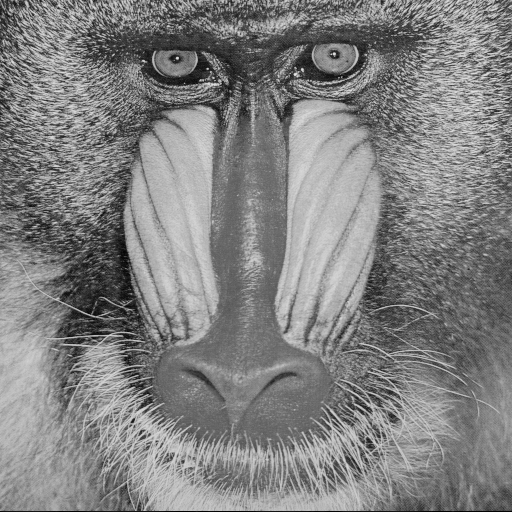

In [6]:
save_show(m, 'gray_mandrill.png')

In [7]:
t_m_m = normalize_image(np.dot(np.transpose(m), m))

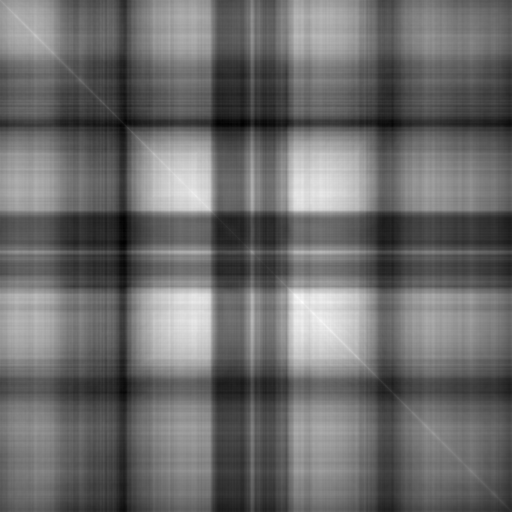

In [8]:
save_show(t_m_m, 'product_float64_t_m_m.png')

In [9]:
m_32 = m.astype(np.float32)

In [10]:
type(m_32[0,0])

numpy.float32

In [11]:
m_32[0,0]

0.5775651

In [12]:
m[0,0]

0.5775650980392157

In [13]:
t_m_m_32 = normalize_image(np.dot(np.transpose(m_32), m_32))

In [14]:
type(t_m_m_32[0,0])

numpy.float32

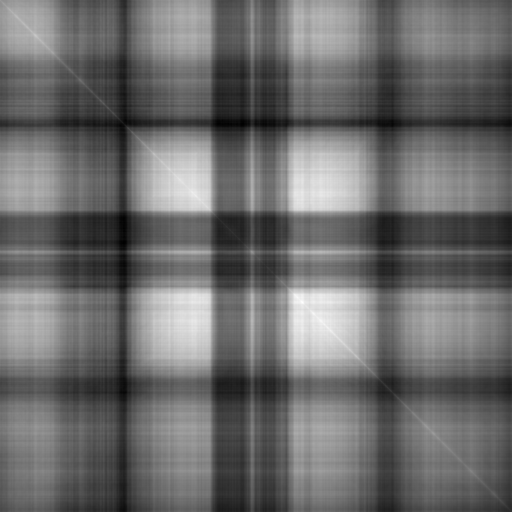

In [15]:
save_show(t_m_m_32, 'product_float32_t_m_m.png')

In [ ]:
# no, 64 bit and 32 bit are indistinguishable.

# the difference between Python and Julia is in something else